## Figure 1: Response of value added to a Russian Oil shock

In [1]:
clear 
set more off
local dir `c(pwd)'

In [2]:
quietly{
    cd "../matlab/output/"
    import delimited "simulation_output.txt"

    encode country_i, g(ctry_i) 
    encode sector_r, g(sect_r)
    encode sectorcode_r, g(code_r)
    egen cross = group(country_i sectorcode_r)


    //Removing RoW and Public Sector
    gen restofworld = (country_i == "ROW")
    gen public_r = (sectorcode_r=="r51"|sectorcode_r=="r52"|sectorcode_r=="r53"|/*
    */sectorcode_r=="r54"|sectorcode_r=="r55"|sectorcode_r=="r56")
    drop if public_r==1
    drop if restofworld ==1
    //sort country_i sectorcode_r year

}
describe



. describe

Contains data
  obs:       986,850                          
 vars:            14                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
rho             float   %8.0g                 
eps             float   %9.0g                 
psi             byte    %8.0g                 
country_i       str3    %9s                   
sector_r        strL    %9s                   
sectorcode_r    str7    %9s                   
lnvhat          float   %9.0g                 lnVhat
lnv             float   %9.0g                 lnV
ctry_i          long    %8.0g      ctry_i     
sect_r          long    %147.0g    sect_r     
code_r          long    %8.0g      code_r     
cross           float   %9.0g                 group(country_i sectorcode_r)
restofworld 

#### Multiplying the parameter by 100

In [3]:
replace rho = rho*100
replace eps = eps*100
replace psi = psi*100


(950,300 real changes made)

(928,800 real changes made)

variable psi was byte now int
(986,850 real changes made)


## Figure 1

In [27]:
quiet cd "`dir'/output/plots

### (a) $\rho=2.5$, $\epsilon=1.5$ and $\psi=2$

In [5]:
reg lnv lnvhat if rho==250 & eps==150 & psi==200 


      Source |       SS           df       MS      Number of obs   =     2,068
-------------+----------------------------------   F(1, 2066)      =  60416.77
       Model |  .001475992         1  .001475992   Prob > F        =    0.0000
    Residual |  .000050473     2,066  2.4430e-08   R-squared       =    0.9669
-------------+----------------------------------   Adj R-squared   =    0.9669
       Total |  .001526465     2,067  7.3849e-07   Root MSE        =    .00016

------------------------------------------------------------------------------
         lnv |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lnvhat |    1.12565   .0045796   245.80   0.000     1.116669    1.134631
       _cons |   .0001425   4.06e-06    35.07   0.000     .0001345    .0001504
------------------------------------------------------------------------------


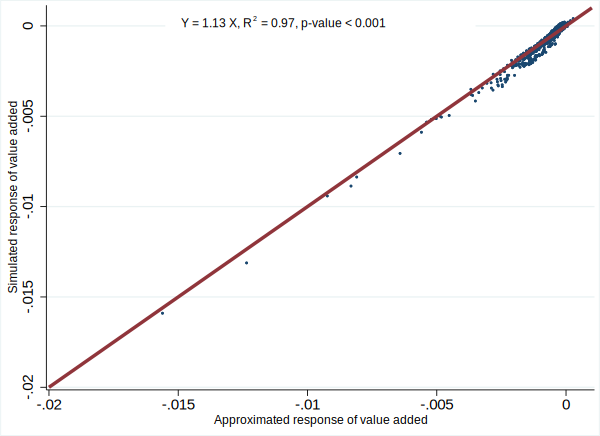

In [6]:
graph drop _all
graph twoway (scatter lnv lnvhat if rho==250 & eps==150 & psi==200, msize(tiny)) /*
*/ (function y = x, ra(-0.02 0.001) lwidth(thick)), /*
*/ xtitle("Approximated response of value added", size(small)) /*
*/ plotr(m(vsmall)) graphregion(m(small) fcolor(white)) title("") note("") name(x1, replace) /*
*/ ytitle("Simulated response of value added", size(small)) plotr(m(vsmall)) /*
*/ graphregion(m(small) fcolor(white)) /*
*/ legend(bplacement(n) col(1) position(3)  ring(0) /*
*/ order(- "Y = 1.13 X, R{superscript:2} = 0.97, p-value < 0.001") /*
*/ size(small) region(lstyle(none)))

In [7]:
quietly graph export scatter_rho250_eps150.pdf, replace

### (b) $\rho=2.5$, $\epsilon=0.05$ and $\psi=2$

In [8]:
replace lnvhat =. if rho==250 & eps==5 & psi==200 & lnvhat>0.2
replace lnv =. if rho==250 & eps==5 & psi==200 & lnv>0.2


(1 real change made, 1 to missing)

(1 real change made, 1 to missing)


In [9]:
reg lnv lnvhat if rho==250 & eps==5 & psi==200 


      Source |       SS           df       MS      Number of obs   =     2,067
-------------+----------------------------------   F(1, 2065)      =  19540.10
       Model |  .020325489         1  .020325489   Prob > F        =    0.0000
    Residual |     .002148     2,065  1.0402e-06   R-squared       =    0.9044
-------------+----------------------------------   Adj R-squared   =    0.9044
       Total |  .022473489     2,066  .000010878   Root MSE        =    .00102

------------------------------------------------------------------------------
         lnv |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lnvhat |   .8987025   .0064291   139.79   0.000     .8860942    .9113107
       _cons |   .0002107   .0000228     9.25   0.000      .000166    .0002553
------------------------------------------------------------------------------


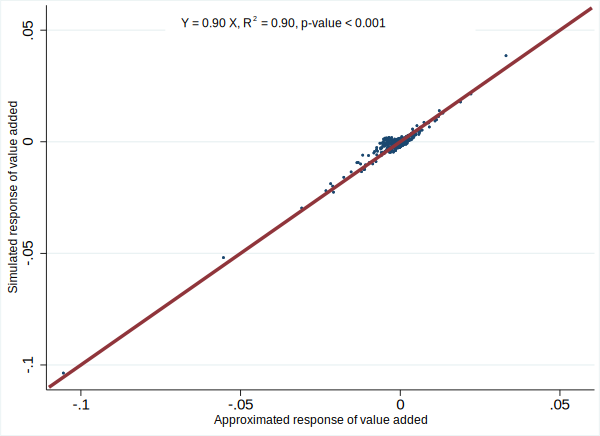

In [10]:
graph drop _all
graph twoway (scatter lnv lnvhat if rho==250 & eps==5 & psi==200, msize(tiny)) /*
*/ (function y = x, ra(-0.11 0.06) lwidth(thick)), /*
*/ xtitle("Approximated response of value added", size(small)) /*
*/ plotr(m(vsmall)) graphregion(m(small) fcolor(white)) title("") note("") name(x1, replace) /*
*/ ytitle("Simulated response of value added", size(small)) plotr(m(vsmall)) /*
*/ graphregion(m(small) fcolor(white)) /*
*/ legend(bplacement(n) col(1) position(3)  ring(0) /*
*/ order(- "Y = 0.90 X, R{superscript:2} = 0.90, p-value < 0.001") /*
*/ size(small) region(lstyle(none)))

In [11]:
quietly graph export scatter_rho250_eps5.pdf, replace

### (c) $\rho=0.05$, $\epsilon=1.5$ and $\psi=2$

In [12]:
reg lnv lnvhat if rho==5 & eps==150 & psi==200 


      Source |       SS           df       MS      Number of obs   =     2,068
-------------+----------------------------------   F(1, 2066)      =    929.71
       Model |  .000121031         1  .000121031   Prob > F        =    0.0000
    Residual |  .000268955     2,066  1.3018e-07   R-squared       =    0.3103
-------------+----------------------------------   Adj R-squared   =    0.3100
       Total |  .000389986     2,067  1.8867e-07   Root MSE        =    .00036

------------------------------------------------------------------------------
         lnv |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lnvhat |   .9737411   .0319352    30.49   0.000     .9111126     1.03637
       _cons |   .0001152   .0000144     8.01   0.000      .000087    .0001434
------------------------------------------------------------------------------


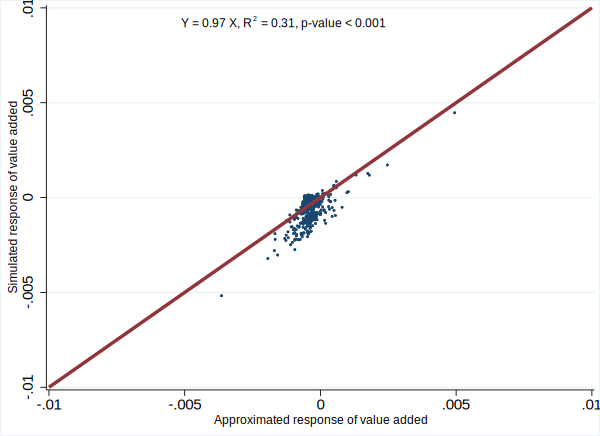

In [13]:
graph drop _all
graph twoway (scatter lnv lnvhat if rho==5 & eps==150 & psi==200, msize(tiny)) /*
*/ (function y = x,  ra(-0.01 0.01) lwidth(thick)), /*
*/ xtitle("Approximated response of value added", size(small)) /*
*/ plotr(m(vsmall)) graphregion(m(small) fcolor(white)) title("") note("") name(x1, replace) /*
*/ ytitle("Simulated response of value added", size(small)) plotr(m(vsmall)) /*
*/ graphregion(m(small) fcolor(white)) /*
*/ legend(bplacement(n) col(1) position(3)  ring(0) /*
*/ order(- "Y = 0.97 X, R{superscript:2} = 0.31, p-value < 0.001") /*
*/ size(small) region(lstyle(none)))

In [14]:
quietly graph export scatter_rho5_eps150.pdf, replace

### (d) $\rho=0.05$, $\epsilon=0.05$ and $\psi=2$

In [15]:
replace lnvhat =. if rho==5 & eps==5 & psi==200 & lnvhat>20
replace lnv =. if rho==5 & eps==5 & psi==200 & lnv>20


(2 real changes made, 2 to missing)

(2 real changes made, 2 to missing)


In [16]:
reg lnv lnvhat if rho==5 & eps==5 & psi==200 


      Source |       SS           df       MS      Number of obs   =     2,066
-------------+----------------------------------   F(1, 2064)      =  76333.21
       Model |  4542.22685         1  4542.22685   Prob > F        =    0.0000
    Residual |  122.818841     2,064  .059505252   R-squared       =    0.9737
-------------+----------------------------------   Adj R-squared   =    0.9737
       Total |  4665.04569     2,065  2.25910203   Root MSE        =    .24394

------------------------------------------------------------------------------
         lnv |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lnvhat |    .968304   .0035047   276.28   0.000     .9614308    .9751772
       _cons |   .0406295    .005367     7.57   0.000     .0301042    .0511547
------------------------------------------------------------------------------


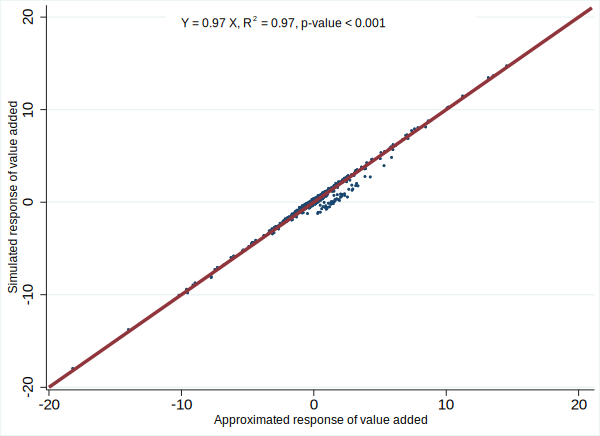

In [17]:
graph drop _all
graph twoway (scatter lnv lnvhat if rho==5 & eps==5 & psi==200, msize(tiny)) /*
*/ (function y = x,  ra(-20 21) lwidth(thick)), /*
*/ xtitle("Approximated response of value added", size(small)) /*
*/ plotr(m(vsmall)) graphregion(m(small) fcolor(white)) title("") note("") name(x1, replace) /*
*/ ytitle("Simulated response of value added", size(small)) plotr(m(vsmall)) /*
*/ graphregion(m(small) fcolor(white)) /*
*/ legend(bplacement(n) col(1) position(3)  ring(0) /*
*/ order(- "Y = 0.97 X, R{superscript:2} = 0.97, p-value < 0.001") /*
*/ size(small) region(lstyle(none)))

In [18]:
quietly graph export scatter_rho5_eps5.pdf, replace

### (e) $\rho=0.05$, $\epsilon=0.1$ and $\psi=2$

In [19]:
replace lnvhat =. if rho==5 & eps==10 & psi==200 & lnvhat<-20
replace lnv =. if rho==5 & eps==10 & psi==200 & lnv<-20


(4 real changes made, 4 to missing)

(4 real changes made, 4 to missing)


In [20]:
reg lnv lnvhat if rho==5 & eps==10 & psi==200 


      Source |       SS           df       MS      Number of obs   =     2,064
-------------+----------------------------------   F(1, 2062)      =  22365.80
       Model |  6379.63945         1  6379.63945   Prob > F        =    0.0000
    Residual |  588.166514     2,062  .285240792   R-squared       =    0.9156
-------------+----------------------------------   Adj R-squared   =    0.9155
       Total |  6967.80596     2,063  3.37751137   Root MSE        =    .53408

------------------------------------------------------------------------------
         lnv |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lnvhat |   .8912304   .0059593   149.55   0.000     .8795435    .9029173
       _cons |  -.0245911   .0117565    -2.09   0.037     -.047647   -.0015352
------------------------------------------------------------------------------


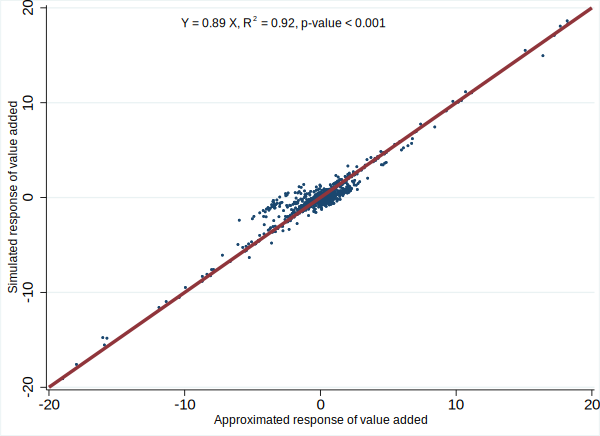

In [21]:
graph drop _all
graph twoway (scatter lnv lnvhat if rho==5 & eps==10 & psi==200, msize(tiny)) /*
*/ (function y = x, ra(-20 20) lwidth(thick)), /*
*/ xtitle("Approximated response of value added", size(small)) /*
*/ plotr(m(vsmall)) graphregion(m(small) fcolor(white)) title("") note("") name(x1, replace) /*
*/ ytitle("Simulated response of value added", size(small)) plotr(m(vsmall)) /*
*/ graphregion(m(small) fcolor(white)) /*
*/ legend(bplacement(n) col(1) position(3)  ring(0) /*
*/ order(- "Y = 0.89 X, R{superscript:2} = 0.92, p-value < 0.001") /*
*/ size(small) region(lstyle(none)))

In [22]:
quietly graph export scatter_rho5_eps10.pdf, replace

### (f) $\rho=0.1$, $\epsilon=0.1$ and $\psi=2$

In [23]:
replace lnvhat =. if rho==10 & eps==10 & psi==200 & lnvhat<-10
replace lnvhat =. if rho==10 & eps==10 & psi==200 & lnvhat>10
replace lnv =. if rho==10 & eps==10 & psi==200 & lnv<-10
replace lnv =. if rho==10 & eps==10 & psi==200 & lnv>10


(1 real change made, 1 to missing)

(1 real change made, 1 to missing)

(1 real change made, 1 to missing)

(1 real change made, 1 to missing)


In [24]:
reg lnv lnvhat if rho==10 & eps==10 & psi==200 


      Source |       SS           df       MS      Number of obs   =     2,066
-------------+----------------------------------   F(1, 2064)      =  12761.78
       Model |  1150.52291         1  1150.52291   Prob > F        =    0.0000
    Residual |  186.077477     2,064  .090153816   R-squared       =    0.8608
-------------+----------------------------------   Adj R-squared   =    0.8607
       Total |  1336.60039     2,065  .647264111   Root MSE        =    .30026

------------------------------------------------------------------------------
         lnv |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lnvhat |   .8268378   .0073192   112.97   0.000     .8124839    .8411916
       _cons |   .0146919   .0066059     2.22   0.026      .001737    .0276468
------------------------------------------------------------------------------


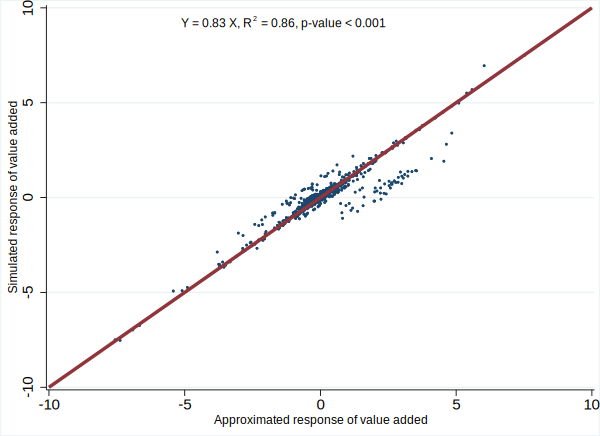

In [25]:
graph drop _all
graph twoway (scatter lnv lnvhat if rho==10 & eps==10 & psi==200, msize(tiny)) /*
*/ (function y = x, ra(-10 10) lwidth(thick)), /*
*/ xtitle("Approximated response of value added", size(small)) /*
*/ plotr(m(vsmall)) graphregion(m(small) fcolor(white)) title("") note("") name(x1, replace) /*
*/ ytitle("Simulated response of value added", size(small)) plotr(m(vsmall)) /*
*/ graphregion(m(small) fcolor(white)) /*
*/ legend(bplacement(n) col(1) position(3)  ring(0) /*
*/ order(- "Y = 0.83 X, R{superscript:2} = 0.86, p-value < 0.001") /*
*/ size(small) region(lstyle(none)))

In [26]:
quietly graph export scatter_rho10_eps10.pdf, replace